# Simplilearn - Decision Tree, Random Forest, kNN

In [5]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [27]:
# Import data
balance_data = pd.read_csv('Decision_Tree_ Dataset.csv')
balance_data.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


***

## Data Cleaning

In [28]:
balance_data.columns

Index(['1', '2', '3', '4', 'sum', 'Unnamed: 5'], dtype='object')

In [29]:
balance_data = balance_data.drop(['sum'], axis=1)

In [31]:
balance_data = balance_data.rename(columns={'1': 'Initial Payment', '2': 'Last Payment', '3': 'Credit Score', '4': 'House Number',
                            'Unnamed: 5': 'Result'})
balance_data.head()

,Initial Payment,Last Payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [32]:
print('Dataset Length: ', len(balance_data))

Dataset Length:  1000


In [33]:
print('Dataset Shape: ', balance_data.shape)

Dataset Shape:  (1000, 5)


In [34]:
# To check whether got missing values or not 
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Initial Payment    1000 non-null int64
Last Payment       1000 non-null int64
Credit Score       1000 non-null int64
House Number       1000 non-null int64
Result             1000 non-null object
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [35]:
balance_data.describe()

,Initial Payment,Last Payment,Credit Score,House Number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


***

## Decision Tree: Train the Model 

In [71]:
# Separating the Target Variable
X = balance_data.iloc[:, 0:4]
y = balance_data.iloc[:, 4]

In [72]:
# Splitting the dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [73]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [74]:
# Function to make Predictions
y_pred = clf_entropy.predict(X_test)
y_pred_prob = clf_entropy.predict_proba(X_test)
print(y_pred)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No'
 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'N

In [75]:
# Checking Accuracy
print('Accuracy is: ', accuracy_score(y_test, y_pred)*100)

Accuracy is:  93.66666666666667


***

## Decision Tree: Evaluate the Model

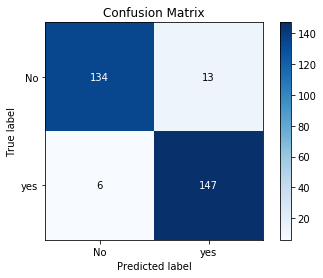

In [76]:
# Plot confusion matrix
from scikitplot.metrics import plot_confusion_matrix as plt_confusion

plt_confusion(y_test, y_pred)

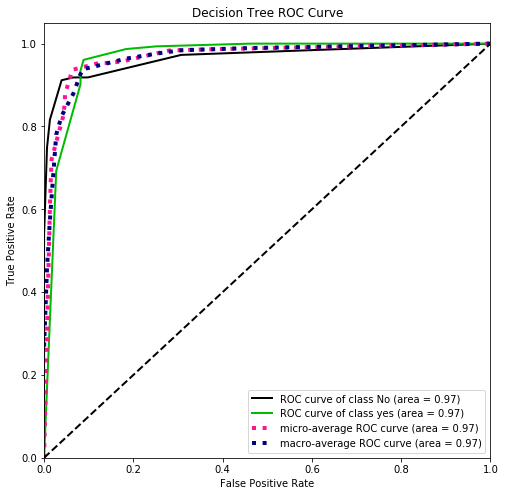

In [86]:
# Plot the ROC curve
from scikitplot.metrics import plot_roc_curve as plt_roc

plt_roc(y_test, y_pred_prob, title='Decision Tree ROC Curve', figsize=(8,8))

***

## Random Forest: Train the Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train.values.ravel())

rf_pred = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test) # Calculate prediction probability

print(rf_pred)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No'
 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' '

C:\Users\neohf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
# Checking Accuracy
print('Accuracy is: ', accuracy_score(y_test, rf_pred)*100)

Accuracy is:  96.66666666666667


***

## Random Forest: Evaluating the model

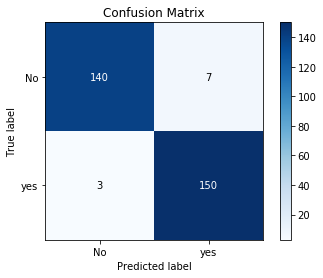

In [81]:
# Plot confusion matrix
from scikitplot.metrics import plot_confusion_matrix as plt_confusion

plt_confusion(y_test, rf_pred)

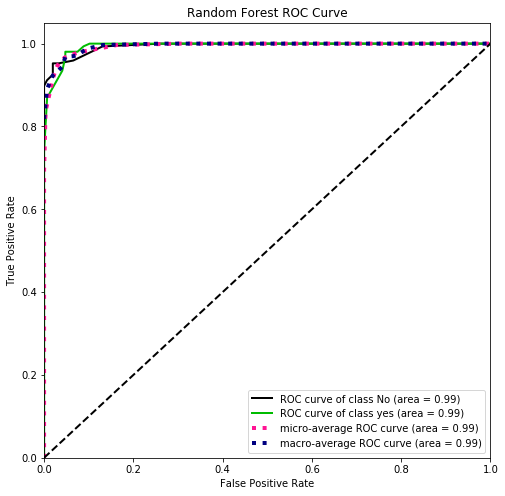

In [85]:
# Plot the ROC curve
from scikitplot.metrics import plot_roc_curve as plt_roc

plt_roc(y_test, rf_pred_prob, title='Random Forest ROC Curve', figsize=(8,8))

***

## kNN: Training the Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn3.fit(X_train, y_train.values.ravel())
knn7.fit(X_train, y_train.values.ravel())

# Predict using the trained model
knn3_pred = knn3.predict(X_test)
knn7_pred = knn7.predict(X_test)

knn3_pred_prob = knn3.predict_proba(X_test)
knn7_pred_prob = knn7.predict_proba(X_test)

In [88]:
# Checking Accuracy
print('Accuracy for knn3 is: ', accuracy_score(y_test, knn3_pred)*100)

Accuracy for knn3 is:  97.66666666666667


In [89]:
# Checking Accuracy
print('Accuracy for knn7 is: ', accuracy_score(y_test, knn7_pred)*100)

Accuracy for knn7 is:  97.33333333333334


***

## kNN: Evaluating the Model

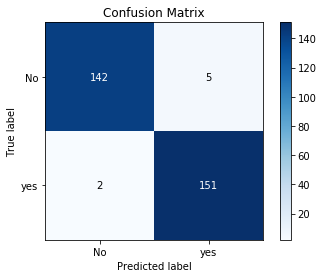

In [91]:
# Plot confusion matrix
from scikitplot.metrics import plot_confusion_matrix as plt_confusion

plt_confusion(y_test, knn3_pred)

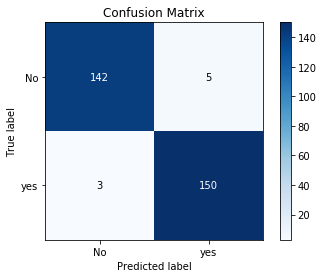

In [92]:
plt_confusion(y_test, knn7_pred)

***

## K-Fold Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

# Flatten y array using ravel() to avoid warning - optional
cv_results_dt = cross_val_score(clf_entropy, X, y.values.ravel(), cv = 10)
cv_results_rf = cross_val_score(rf, X, y.values.ravel(), cv = 10)
cv_results_knn3 = cross_val_score(knn3, X, y.values.ravel(), cv = 10)
cv_results_knn7 = cross_val_score(knn7, X, y.values.ravel(), cv = 10)

print('The 10-fold cross validation result for Decision Tree is {:.2f}%'.format(np.mean(cv_results_dt)*100))
print('The 10-fold cross validation result for Random Forest is {:.2f}%'.format(np.mean(cv_results_rf)*100))
print('The 10-fold cross validation result for kNN with n=3 is {:.2f}%'.format(np.mean(cv_results_knn3)*100))
print('The 10-fold cross validation result for kNN with n=7 is {:.2f}%'.format(np.mean(cv_results_knn7)*100))

The 10-fold cross validation result for Decision Tree is 87.99%
The 10-fold cross validation result for Random Forest is 94.39%
The 10-fold cross validation result for kNN with n=3 is 95.49%
The 10-fold cross validation result for kNN with n=7 is 95.60%


## Random Sampling Cross Validation

In [97]:
# Perform Random Sampling Cross Validation
from sklearn.model_selection import ShuffleSplit

# Instantiate Random Sampling CV Object
rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=10)

# Create empty lists to store score 
randomcv_dt = []
randomcv_rf = []
randomcv_knn3 = []
randomcv_knn7 = []

# Generate train and test index using random splitting via the split() method
# Flatten array using ravel() to avoid warnings - optional
for train_index, test_index in rs.split(X):
    clf_entropy.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    rf.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    knn3.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    knn7.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    
    # Append scoring/accuracy for each iteration in list
    randomcv_dt.append(clf_entropy.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    randomcv_rf.append(rf.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    randomcv_knn3.append(knn3.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    randomcv_knn7.append(knn7.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    
# Calculate the average of all iteration
print('The random sampling cross validation result ({} iterations) for Decision Tree is {:.2f}%'
      .format(rs.get_n_splits(X), np.mean(randomcv_dt)*100))
print('The random sampling cross validation result ({} iterations) for Random Forest is {:.2f}%'
      .format(rs.get_n_splits(X), np.mean(randomcv_rf)*100))
print('The random sampling cross validation result ({} iterations) for kNN with n=3 is {:.2f}%'
      .format(rs.get_n_splits(X), np.mean(randomcv_knn3)*100))
print('The random sampling cross validation result ({} iterations) for kNN with n=7 is {:.2f}%'
      .format(rs.get_n_splits(X), np.mean(randomcv_knn7)*100))

The random sampling cross validation result (10 iterations) for Decision Tree is 91.93%
The random sampling cross validation result (10 iterations) for Random Forest is 96.47%
The random sampling cross validation result (10 iterations) for kNN with n=3 is 97.60%
The random sampling cross validation result (10 iterations) for kNN with n=7 is 97.67%


## Leave-One-Out Cross Validation

In [98]:
# Perform Leave-One-Out Cross Validation
from sklearn.model_selection import LeaveOneOut

# Instantiate LeaveOneOut CV object
loo = LeaveOneOut()

# Create empty lists to store score for kNN and RF
loocv_dt = []
loocv_rf = []
loocv_knn3 = []
loocv_knn7 = []

# Generate train and test index using random splitting via the split() method
# Flatten array using ravel() to avoid warnings - optional
for train_index, test_index in loo.split(X):
    clf_entropy.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    rf.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    knn3.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    knn7.fit(X.loc[train_index], y.loc[train_index].values.ravel())
    
    # Append scoring/accuracy for each iteration in list
    loocv_dt.append(clf_entropy.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    loocv_rf.append(rf.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    loocv_knn3.append(knn3.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    loocv_knn7.append(knn7.score(X.loc[test_index], y.loc[test_index].values.ravel()))
    
# Calculate the average of all iteration
print('The leave-one-out cross validation result for Decision Tree is {:.2f}%'.format(np.mean(loocv_dt)*100))
print('The leave-one-out cross validation result for Random Forest is {:.2f}%'.format(np.mean(loocv_rf)*100))
print('The leave-one-out cross validation result for kNN with n=3 is {:.2f}%'.format(np.mean(loocv_knn3)*100))
print('The leave-one-out cross validation result for kNN with n=7 is {:.2f}%'.format(np.mean(loocv_knn7)*100))

The leave-one-out cross validation result for Decision Tree is 90.30%
The leave-one-out cross validation result for Random Forest is 96.50%
The leave-one-out cross validation result for kNN with n=3 is 98.10%
The leave-one-out cross validation result for kNN with n=7 is 98.30%


***

## Comparison

In [99]:
accuracies = pd.DataFrame(data=
                    {'Cross Validation Methods': ['Without Cross Validation', 'K-Fold', 'Random Sampling', 'Leave-One-Out'], 
                     'Decision Tree': (accuracy_score(y_test, y_pred)*100, np.mean(cv_results_dt)*100, np.mean(randomcv_dt)*100, np.mean(loocv_dt)*100), 
                     'Random Forest': (accuracy_score(y_test, rf_pred)*100, np.mean(cv_results_rf)*100, np.mean(randomcv_rf)*100, np.mean(loocv_rf)*100),
                     'kNN with n=3': (accuracy_score(y_test, knn3_pred)*100, np.mean(cv_results_knn3)*100, np.mean(randomcv_knn3)*100, np.mean(loocv_knn3)*100),
                     'kNN with n=7': (accuracy_score(y_test, knn7_pred)*100, np.mean(cv_results_knn7)*100, np.mean(randomcv_knn7)*100, np.mean(loocv_knn7)*100),
                    })

accuracies

,Cross Validation Methods,Decision Tree,Random Forest,kNN with n=3,kNN with n=7
0,Without Cross Validation,93.666667,96.666667,97.666667,97.333333
1,K-Fold,87.993459,94.390569,95.493599,95.598630
2,Random Sampling,91.933333,96.466667,97.600000,97.666667
3,Leave-One-Out,90.300000,96.500000,98.100000,98.300000
